In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_data,clinical_data,on="Mouse ID",how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()
del Mean_tumor['Metastatic Sites']

# Convert to DataFrame
Mean_tumor=Mean_tumor.reset_index(drop=False)

# Preview DataFrame
Mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = combined_data.groupby(["Drug","Timepoint"]).sem()
del sem_tumor['Metastatic Sites']
del sem_tumor['Mouse ID']
sem_tumor.head()

# Convert to DataFrame
sem_tumor=sem_tumor.reset_index(drop=False)

# Preview DataFrame
sem_tumor.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
Mean_tumor=Mean_tumor.set_index(["Drug","Timepoint"]).unstack(level=0)
Mean_tumor.columns=Mean_tumor.columns.droplevel(0)
sem_tumor=sem_tumor.set_index(["Drug","Timepoint"]).unstack(level=0)
sem_tumor.columns=sem_tumor.columns.droplevel(0)
# Preview that Reformatting worked
Mean_tumor


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
Mean_tumor=Mean_tumor.reset_index(drop=False)

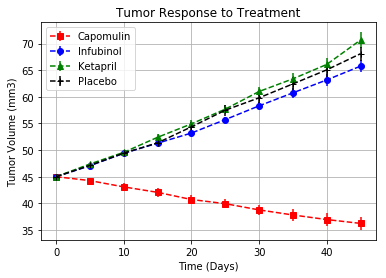

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

plt.errorbar(Mean_tumor["Timepoint"],Mean_tumor["Capomulin"],yerr=sem_tumor["Capomulin"],fmt="rs--")
plt.errorbar(Mean_tumor["Timepoint"],Mean_tumor["Infubinol"],yerr=sem_tumor["Infubinol"],fmt="bo--")
plt.errorbar(Mean_tumor["Timepoint"],Mean_tumor["Ketapril"],yerr=sem_tumor["Ketapril"],fmt="g^--")
plt.errorbar(Mean_tumor["Timepoint"],Mean_tumor["Placebo"],yerr=sem_tumor["Placebo"],fmt="k+--")

plt.title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best")
# Save the Figure
plt.savefig("../Images/TumorResponse.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()
del Metastatic_tumor["Tumor Volume (mm3)"]

# Convert to DataFrame
Metastatic_tumor=Metastatic_tumor.reset_index(drop=False)

# Preview DataFrame
Metastatic_tumor.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_Metastatic = combined_data.groupby(["Drug","Timepoint"]).sem()
del sem_Metastatic['Tumor Volume (mm3)']
del sem_Metastatic['Mouse ID']


# Convert to DataFrame
sem_Metastatic=sem_Metastatic.reset_index(drop=False)


# Preview DataFrame
sem_Metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_tumor=Metastatic_tumor.set_index(["Drug","Timepoint"]).unstack(level=0)
Metastatic_tumor.columns=Metastatic_tumor.columns.droplevel(0)
sem_Metastatic=sem_Metastatic.set_index(["Drug","Timepoint"]).unstack(level=0)
sem_Metastatic.columns=sem_Metastatic.columns.droplevel(0)

# Preview that Reformatting worked
Metastatic_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


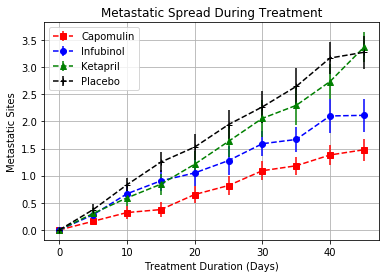

In [10]:
Metastatic_tumor=Metastatic_tumor.reset_index(drop=False)

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

plt.errorbar(Metastatic_tumor["Timepoint"],Metastatic_tumor["Capomulin"],yerr=sem_Metastatic["Capomulin"],fmt="rs--")
plt.errorbar(Metastatic_tumor["Timepoint"],Metastatic_tumor["Infubinol"],yerr=sem_Metastatic["Infubinol"],fmt="bo--")
plt.errorbar(Metastatic_tumor["Timepoint"],Metastatic_tumor["Ketapril"],yerr=sem_Metastatic["Ketapril"],fmt="g^--")
plt.errorbar(Metastatic_tumor["Timepoint"],Metastatic_tumor["Placebo"],yerr=sem_Metastatic["Placebo"],fmt="k+--")

plt.title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/MetastaticSpread.png")
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mice = combined_data.groupby(["Drug","Timepoint"]).count()
del grouped_mice['Tumor Volume (mm3)']
del grouped_mice['Metastatic Sites']


# Convert to DataFrame
grouped_mice=grouped_mice.reset_index(drop=False)
grouped_mice=grouped_mice.rename(columns={"Drug":"Drug","Timepoint":"Timepoint","Mouse ID":"Mouse Count"})

# Preview DataFrame
grouped_mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mice=grouped_mice.set_index(["Drug","Timepoint"]).unstack(level=0)
grouped_mice.columns=grouped_mice.columns.droplevel(0)

# Preview the Data Frame
grouped_mice
grouped_mice=grouped_mice.reset_index(drop=False)

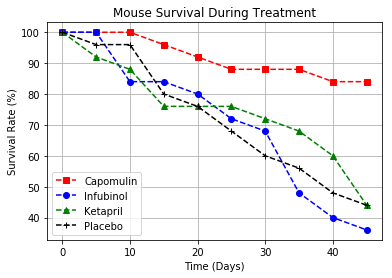

In [13]:

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

plt.plot(grouped_mice["Timepoint"],(grouped_mice["Capomulin"]/grouped_mice["Capomulin"].max())*100,"rs--")
plt.plot(grouped_mice["Timepoint"],(grouped_mice["Infubinol"]/grouped_mice["Infubinol"].max())*100,"bo--")
plt.plot(grouped_mice["Timepoint"],(grouped_mice["Ketapril"]/grouped_mice["Ketapril"].max())*100,"g^--")
plt.plot(grouped_mice["Timepoint"],(grouped_mice["Placebo"]/grouped_mice["Placebo"].max())*100,"k+--")

plt.title("Mouse Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/SurvivalRate.png")
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
volchange = combined_data.groupby(["Drug","Timepoint"]).mean()
volchange = volchange.reset_index(drop=False)
volchange = volchange.loc[volchange["Timepoint"]==45,["Drug","Tumor Volume (mm3)"]]
volchange["% Change"]=((volchange["Tumor Volume (mm3)"]-45)/45)*100
del volchange['Tumor Volume (mm3)']
# Display the data to confirm
volchange


,Drug,% Change
9,Capomulin,-19.475303
19,Ceftamin,42.516492
29,Infubinol,46.123472
39,Ketapril,57.028795
49,Naftisol,53.923347
59,Placebo,51.297960
69,Propriva,47.241175
79,Ramicane,-22.320900
89,Stelasyn,52.085134
99,Zoniferol,46.579751


[('Infubinol', 46.12347172785187), ('Ketapril', 57.028794686606076), ('Placebo', 51.29796048315153)]


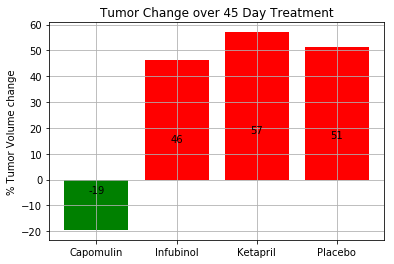

In [32]:
# Store all Relevant Percent Changes into a Tuple
t=tuple(volchange.itertuples(index=False, name=None))

# Splice the data between passing and failing drugs
passing = [x for x in t if (x[1] > 0 and (x[0]=="Capomulin" or x[0]=="Infubinol" or x[0]=="Ketapril" or x[0]=="Placebo"))]
failing  = [x for x in t if (x[1] <= 0 and (x[0]=="Capomulin" or x[0]=="Infubinol" or x[0]=="Ketapril" or x[0]=="Placebo"))]

#print(passing)
print(passing)

df1 = pd.DataFrame(passing)
df2 = pd.DataFrame(failing)

labels=pd.concat([df1,df2])
labels=labels[1]

fig, ax = plt.subplots()

# Orient widths. Add labels, tick marks, etc. 
rects1=ax.bar(df2[0], df2[1], color = 'green')
rects2=ax.bar(df1[0], df1[1], color = 'red')

ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume change")
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .3*height,
                '%d' % int(height),
                ha='center', va='bottom')

# Call functions to implement the function calls

autolabel(rects1)
autolabel(rects2)

# Save the Figure
plt.savefig("../Images/TumorChange.png")

# Show the Figure
plt.show()

Observable trends based on the data

- Of the 4 treatments Capomulin was the only drug to be effective at reducting tumor volume
- The effectivness of Ketapril was withing the error bars of the placibo treatment
- Of the 4 treatments Capomulin was the only drug to be effective significnatly increating surviaval rate vs the placibo
